In [898]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statistics
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats
from arch import arch_model
from statsmodels.tsa.api import VAR

In [899]:
# full_df = pd.read_excel('full_data.xlsx')
# full_df

In [900]:
# PBK_df = full_df.drop(axis=1, columns=['PP', 'PB'])
# PBK_df

In [901]:
# PP_df = full_df.drop(axis=1, columns=['PBK', 'PB'])
# PP_df

In [902]:
# PB_df = full_df.drop(axis=1, columns=['PBK', 'PP'])
# PB_df

In [903]:
PBK_df = pd.read_excel(io='Data_manhdu.xlsx', sheet_name='PBK')
PBK_df

,Date,PBK
0,2015-01-01,1213.40
1,2015-01-02,1203.20
2,2015-01-04,1202.00
3,2015-01-05,1212.95
4,2015-01-06,1219.65
...,...,...
2483,2022-12-26,1036.00
2484,2022-12-27,1032.70
2485,2022-12-28,1019.80
2486,2022-12-29,1065.00


In [904]:
PP_df = pd.read_excel(io='Data_manhdu.xlsx', sheet_name='PP')
PP_df

,Date,PP
0,2015-01-01,796.30
1,2015-01-02,794.85
2,2015-01-05,793.20
3,2015-01-06,800.40
4,2015-01-07,792.45
...,...,...
2319,2022-12-26,1763.00
2320,2022-12-27,1826.30
2321,2022-12-28,1785.00
2322,2022-12-29,1824.10


In [905]:
PB_df = pd.read_excel(io='Data_manhdu.xlsx', sheet_name='PB')
PB_df

,Date,PB
0,2015-01-02,15.768
1,2015-01-05,16.213
2,2015-01-06,16.637
3,2015-01-07,16.544
4,2015-01-08,16.385
...,...,...
2046,2022-12-26,24.055
2047,2022-12-27,24.217
2048,2022-12-28,23.840
2049,2022-12-29,24.250


## PBK

### 1. Data preparation

In [906]:
df_pbk = PBK_df.copy()
df_pbk = df_pbk.set_index('Date')
df_pbk.index = pd.to_datetime(df_pbk.index)
# df = df.to_numpy()
df_pbk

,PBK
Date,
2015-01-01,1213.40
2015-01-02,1203.20
2015-01-04,1202.00
2015-01-05,1212.95
2015-01-06,1219.65
...,...
2022-12-26,1036.00
2022-12-27,1032.70
2022-12-28,1019.80


In [907]:
df_data_pbk = PBK_df.copy()
df_data_pbk = df_data_pbk.to_numpy()
data_pbk = df_data_pbk[:, 1]
data_pbk = np.float32(data_pbk)
data_pbk

array([1213.4, 1203.2, 1202. , ..., 1019.8, 1065. , 1082.9], dtype=float32)

In [908]:
r_pbk= np.diff(np.log(data_pbk), n=1, axis=0)

In [909]:
r_pbk

array([-0.00844145, -0.00099802,  0.00906849, ..., -0.0125699 ,
        0.04336834,  0.01666784], dtype=float32)

In [910]:
df_r_pbk_temp = PBK_df.copy()
df_r_pbk_temp.drop(axis=0, index=[0], inplace=True)
df_r_pbk_temp

,Date,PBK
1,2015-01-02,1203.20
2,2015-01-04,1202.00
3,2015-01-05,1212.95
4,2015-01-06,1219.65
5,2015-01-07,1220.65
...,...,...
2483,2022-12-26,1036.00
2484,2022-12-27,1032.70
2485,2022-12-28,1019.80
2486,2022-12-29,1065.00


In [911]:
df_r_pbk_temp['Return'] = r_pbk
df_r_pbk_temp.drop(axis=1, columns='PBK', inplace=True)
df_r_pbk_temp = df_r_pbk_temp.set_index('Date')
df_r_pbk_temp.index = pd.to_datetime(df_r_pbk_temp.index)
df_r_pbk_temp

,Return
Date,
2015-01-02,-0.008441
2015-01-04,-0.000998
2015-01-05,0.009068
2015-01-06,0.005509
2015-01-07,0.000819
...,...
2022-12-26,0.006196
2022-12-27,-0.003191
2022-12-28,-0.012570


### 2. Visualize

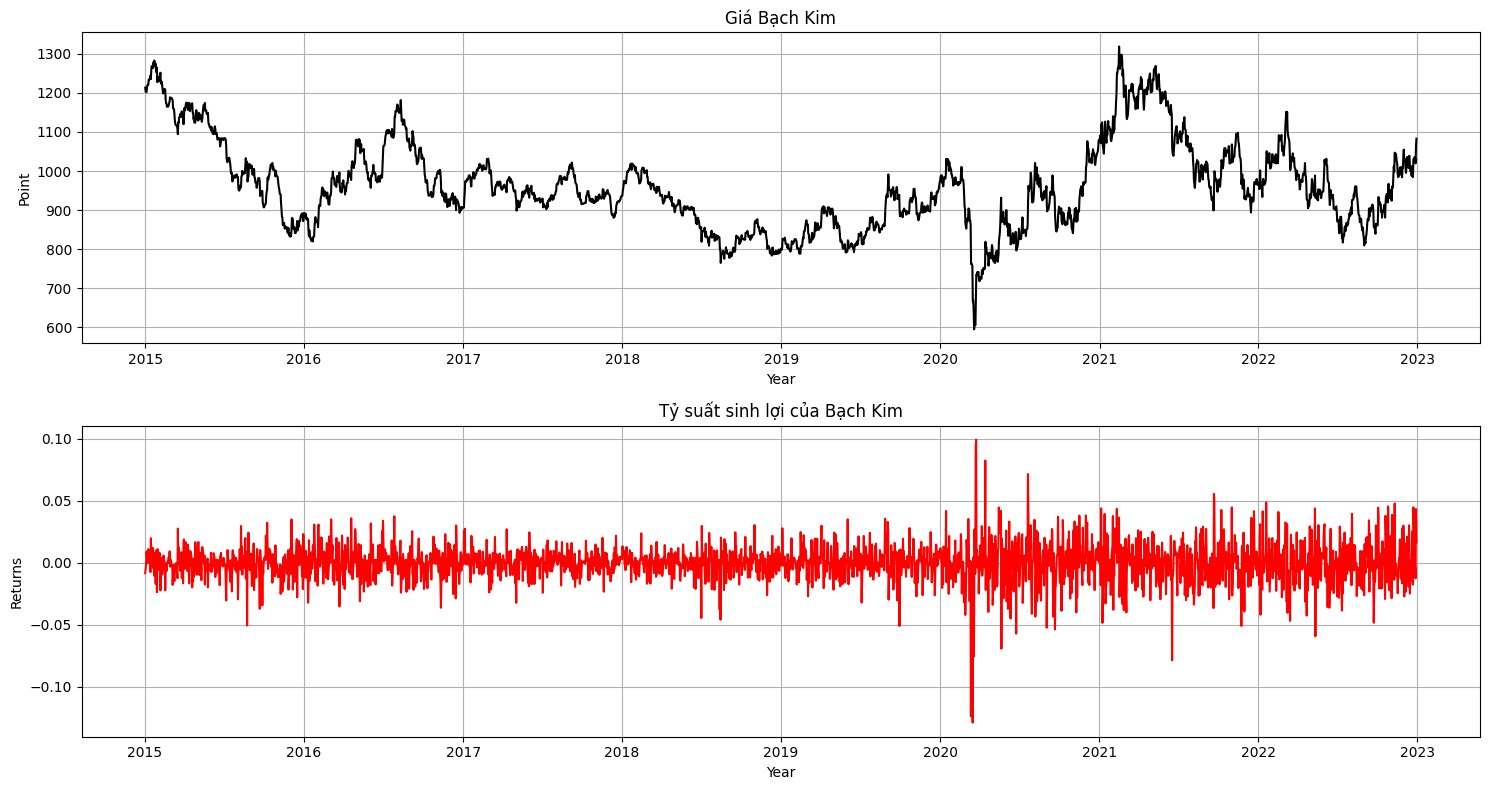

In [912]:
fig, ax= plt.subplots(2,1, figsize=(15,8))
ax[0].plot(df_pbk, color='black')
ax[0].title.set_text('Giá Bạch Kim')
ax[0].set(xlabel='Year', ylabel='Point')
ax[0].grid(True)
ax[1].plot(df_r_pbk_temp, color='red')
ax[1].title.set_text('Tỷ suất sinh lợi của Bạch Kim')
ax[1].set(xlabel='Year', ylabel='Returns')
ax[1].grid(True)
plt.tight_layout()

### 3. Descriptive Statistic

In [913]:
print('Obs       :', len(r_pbk))
print('Median    :', np.median(r_pbk))
print('Mean      :', np.mean(r_pbk))
print('Std. Dev  :', np.std(r_pbk, ddof=1))
print('Minimum   :', np.min(r_pbk))
print('Maximum   :', np.max(r_pbk))
print('Skewness  :', stats.skew(r_pbk))
print('Kurtosis  :', stats.kurtosis(r_pbk, fisher = False))
print('Jarque-Bera test:', stats.jarque_bera(r_pbk))

Obs       : 2487
Median    : 0.00026273727
Mean      : -4.575125e-05
Std. Dev  : 0.0151277315
Minimum   : -0.12903643
Maximum   : 0.099313736
Skewness  : -0.3310558080076415
Kurtosis  : 9.866806468488578
Jarque-Bera test: SignificanceResult(statistic=4931.661194669448, pvalue=0.0)


In [914]:
adf_ppk = adfuller(r_pbk)
print('ADF Statistic:', adf_ppk[0])
print('p-value:', adf_ppk[1])
print('Critical Values:', adf_ppk[4])

ADF Statistic: -18.065182002861924
p-value: 2.614306163929337e-30
Critical Values: {'1%': -3.4329927491693426, '5%': -2.8627075477802673, '10%': -2.567391531704927}


### 4. ARCH(1)

In [915]:
dist = 'normal'

In [916]:
#Chuyển TSSL sang dạng % cho thuận tiện
rp_pbk = r_pbk*100

In [917]:
#Ước lượng mô hình ARCH(1)
am0= arch_model(rp_pbk, mean = 'Constant', p=1, o=0, q=0, dist=dist)
arch1 = am0.fit(update_freq=5, disp = "off")
print("ARCH(1) model:", "\n", arch1.summary(), "\n")
#Kiểm định phần dư của ARCH(1)
arch_stdresid= arch1.resid/arch1.conditional_volatility
arch1lb = acorr_ljungbox(arch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',arch1lb)
jb_arch = jarque_bera(arch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

ARCH(1) model: 
                       Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4516.56
Distribution:                  Normal   AIC:                           9039.13
Method:            Maximum Likelihood   BIC:                           9056.58
                                        No. Observations:                 2487
Date:                Fri, Jun 14 2024   Df Residuals:                     2486
Time:                        13:44:28   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -6.8735e-03  2.856e-02  

In [918]:
# LM test
arch1.arch_lm_test(standardized=True)

ARCH-LM Test
H0: Standardized residuals are homoskedastic.
ARCH-LM Test
H1: Standardized residuals are conditionally heteroskedastic.
Statistic: 429.6226
P-value: 0.0000
Distributed: chi2(27)
WaldTestStatistic, id: 0x1716018d5a0

### 5. GARCH(1, 1)

In [919]:
#Ước lượng mô hình GARCH(1,1)
am1 = arch_model(rp_pbk, mean = 'Constant', vol='GARCH', p=1, o=0, q=1, dist=dist)
garch1_1 = am1.fit(update_freq=5, disp = "off")
print("GARCH(1,1) model:", "\n", garch1_1.summary(), "\n")

#Kiểm định phần dư của GARCH(1,1)
garch_stdresid= garch1_1.resid/garch1_1.conditional_volatility
garch11lb = acorr_ljungbox(garch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',garch11lb)
jb_arch = jarque_bera(garch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

GARCH(1,1) model: 
                      Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4300.40
Distribution:                  Normal   AIC:                           8608.79
Method:            Maximum Likelihood   BIC:                           8632.07
                                        No. Observations:                 2487
Date:                Fri, Jun 14 2024   Df Residuals:                     2486
Time:                        13:44:29   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0175  2.431e-02   

### 6. GJR-GARCH

In [920]:
#Ước lượng mô hình TGARCH(1,1)
am2 = arch_model(rp_pbk, mean = 'Constant', vol='GARCH', p=1, o=1, q=1, dist=dist)
leverage_garch1_1 = am2.fit(update_freq=5, disp = "off")
print("TGARCH(1,1) model:", "\n", leverage_garch1_1.summary(), "\n")

#Kiểm định phần dư của TGARCH(1,1)
tgarch_stdresid= leverage_garch1_1.resid/leverage_garch1_1.conditional_volatility
tgarch11lb = acorr_ljungbox(tgarch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',tgarch11lb)
jb_arch = jarque_bera(tgarch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

TGARCH(1,1) model: 
                    Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -4296.69
Distribution:                  Normal   AIC:                           8603.39
Method:            Maximum Likelihood   BIC:                           8632.48
                                        No. Observations:                 2487
Date:                Fri, Jun 14 2024   Df Residuals:                     2486
Time:                        13:44:29   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0262  2.465e-02  

### 7. EGARCH

In [921]:
#Ước lượng mô hình EGARCH(1,1)
am3 = arch_model(rp_pbk, mean = 'Constant', vol='EGARCH', p=1, o=1, q=1, dist=dist)
exponetial_garch1_1 = am3.fit(update_freq=5, disp = "off")
print("EGARCH(1,1) model:", "\n", exponetial_garch1_1.summary(), "\n")

#Kiểm định phần dư của TGARCH(1,1)
egarch_stdresid= exponetial_garch1_1.resid/exponetial_garch1_1.conditional_volatility
egarch11lb = acorr_ljungbox(egarch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',egarch11lb)
jb_arch = jarque_bera(egarch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

EGARCH(1,1) model: 
                      Constant Mean - EGARCH Model Results                     
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -4301.29
Distribution:                  Normal   AIC:                           8612.59
Method:            Maximum Likelihood   BIC:                           8641.68
                                        No. Observations:                 2487
Date:                Fri, Jun 14 2024   Df Residuals:                     2486
Time:                        13:44:29   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0339  2.526e-02  

### 8. Evaluate

In [922]:
def tic(forecast, actual):
    sse = np.sum((forecast - actual)**2)  
    starch = np.sum((actual - np.mean(actual))**2)
    
    return np.sqrt(sse/starch)

In [923]:
#Tính các giá trị sai số của mô hình ARCH(1)
res= am0.fit(last_obs=1987, update_freq=5, disp='off')
forecasts = res.forecast(horizon=1)
forecast_vals = forecasts.residual_variance.values[-10:]
actual_vals = rp_pbk[-10:]

rmse_arch1 = np.sqrt(mean_squared_error(actual_vals, forecast_vals))
mae_arch1 = mean_absolute_error(actual_vals, forecast_vals)
mape_arch1 = np.mean(np.abs(forecast_vals - actual_vals)/np.abs(actual_vals))

tic_arch1 = tic(forecast_vals, actual_vals) 

print('ARCH(1):')
print('RMSE: %0.3f' % rmse_arch1)
print('MAE: %0.3f' % mae_arch1) 
print('MAPE: %0.3f' % mape_arch1)
print('TIC: % 0.3f' % tic_arch1)

#Tính các giá trị sai số của mô hình GARCH(1,1)
res1= am1.fit(last_obs=1987, update_freq=5, disp='off')
forecasts1 = res1.forecast(horizon=1)
forecast_vals1 = forecasts1.residual_variance.values[-10:]

rmse_garch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals1))
mae_garch11 = mean_absolute_error(actual_vals, forecast_vals1)
mape_garch11 = np.mean(np.abs(forecast_vals1 - actual_vals)/np.abs(actual_vals))

tic_garch11 = tic(forecast_vals1, actual_vals) 

print('\nRMSE: %0.3f' % rmse_garch11)
print('MAE: %0.3f' % mae_garch11) 
print('MAPE: %0.3f' % mape_garch11)
print('TIC: % 0.3f' % tic_garch11)

#Tính các giá trị sai số của mô hình TGARCH(1,1)
res2= am2.fit(last_obs=1987, update_freq=5, disp='off')
forecasts2 = res2.forecast(horizon=1)
forecast_vals2 = forecasts2.residual_variance.values[-10:]

rmse_tgarch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals2))
mae_tgarch11 = mean_absolute_error(actual_vals, forecast_vals2)
mape_tgarch11 = np.mean(np.abs(forecast_vals2 - actual_vals)/np.abs(actual_vals))

tic_tgarch11 = tic(forecast_vals2, actual_vals) 

print('\nRMSE: %0.3f' % rmse_tgarch11)
print('MAE: %0.3f' % mae_tgarch11) 
print('MAPE: %0.3f' % mape_tgarch11)
print('TIC: % 0.3f' % tic_tgarch11)

#Tính các giá trị sai số của mô hình EGARCH(1,1)
res3= am3.fit(last_obs=1987, update_freq=5, disp='off')
forecasts3 = res3.forecast(horizon=1)
forecast_vals3 = forecasts3.residual_variance.values[-10:]

rmse_egarch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals3))
mae_egarch11 = mean_absolute_error(actual_vals, forecast_vals3)
mape_egarch11 = np.mean(np.abs(forecast_vals3 - actual_vals)/np.abs(actual_vals))

tic_egarch11 = tic(forecast_vals3, actual_vals) 

print('\nRMSE: %0.3f' % rmse_egarch11)
print('MAE: %0.3f' % mae_egarch11) 
print('MAPE: %0.3f' % mape_egarch11)
print('TIC: % 0.3f' % tic_egarch11)

RMSE_value=[rmse_arch1, rmse_garch11, rmse_tgarch11, rmse_egarch11]
best_RMSEprediction= np.argmin(RMSE_value)
print('\nBest Forecasting Model (Lowest RMSE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_RMSEprediction])

MAE_value=[mae_arch1, mae_arch1, mae_tgarch11, mae_egarch11]
best_MAEprediction= np.argmin(MAE_value)
print('\nBest Forecasting Model (Lowest MAE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_MAEprediction])

MAPE_value=[mape_arch1, mape_garch11, mape_tgarch11, mape_egarch11]
best_MAPEprediction= np.argmin(MAPE_value)
print('\nBest Forecasting Model (Lowest MAPE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_MAPEprediction])

TIC_value=[tic_arch1, tic_garch11, tic_tgarch11, tic_egarch11]
best_TICprediction= np.argmin(TIC_value)
print('\nBest Forecasting Model (Lowest TIC):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_TICprediction])


ARCH(1):
RMSE: 2.309
MAE: 1.870
MAPE: 2.633
TIC:  4.453

RMSE: 3.434
MAE: 2.966
MAPE: 3.331
TIC:  5.036

RMSE: 3.235
MAE: 2.831
MAPE: 3.057
TIC:  4.672

RMSE: 3.771
MAE: 3.229
MAPE: 3.604
TIC:  5.393

Best Forecasting Model (Lowest RMSE): ARCH(1)

Best Forecasting Model (Lowest MAE): ARCH(1)

Best Forecasting Model (Lowest MAPE): ARCH(1)

Best Forecasting Model (Lowest TIC): ARCH(1)


## PP

### 1. Data preparation

In [924]:
df_pp = PP_df.copy()
df_pp = df_pp.set_index('Date')
df_pp.index = pd.to_datetime(df_pp.index)
# df = df.to_numpy()
df_pp

,PP
Date,
2015-01-01,796.30
2015-01-02,794.85
2015-01-05,793.20
2015-01-06,800.40
2015-01-07,792.45
...,...
2022-12-26,1763.00
2022-12-27,1826.30
2022-12-28,1785.00


In [925]:
df_data_pp = PP_df.copy()
df_data_pp = df_data_pp.to_numpy()
data_pp = df_data_pp[:, 1]
data_pp = np.float32(data_pp)
data_pp

array([ 796.3 ,  794.85,  793.2 , ..., 1785.  , 1824.1 , 1806.7 ],
      dtype=float32)

In [926]:
r_pp = np.diff(np.log(data_pp), n=1, axis=0)
r_pp

array([-0.00182247, -0.00207806,  0.00903606, ..., -0.02287388,
        0.02166843, -0.0095849 ], dtype=float32)

In [927]:
df_r_pp_temp = PP_df.copy()
df_r_pp_temp.drop(axis=0, index=[0], inplace=True)
df_r_pp_temp

,Date,PP
1,2015-01-02,794.85
2,2015-01-05,793.20
3,2015-01-06,800.40
4,2015-01-07,792.45
5,2015-01-08,793.10
...,...,...
2319,2022-12-26,1763.00
2320,2022-12-27,1826.30
2321,2022-12-28,1785.00
2322,2022-12-29,1824.10


In [928]:
df_r_pp_temp['Return'] = r_pp
df_r_pp_temp.drop(axis=1, columns='PP', inplace=True)
df_r_pp_temp = df_r_pp_temp.set_index('Date')
df_r_pp_temp.index = pd.to_datetime(df_r_pp_temp.index)
df_r_pp_temp

,Return
Date,
2015-01-02,-0.001822
2015-01-05,-0.002078
2015-01-06,0.009036
2015-01-07,-0.009982
2015-01-08,0.000820
...,...
2022-12-26,0.017740
2022-12-27,0.035275
2022-12-28,-0.022874


### 2. Visualize

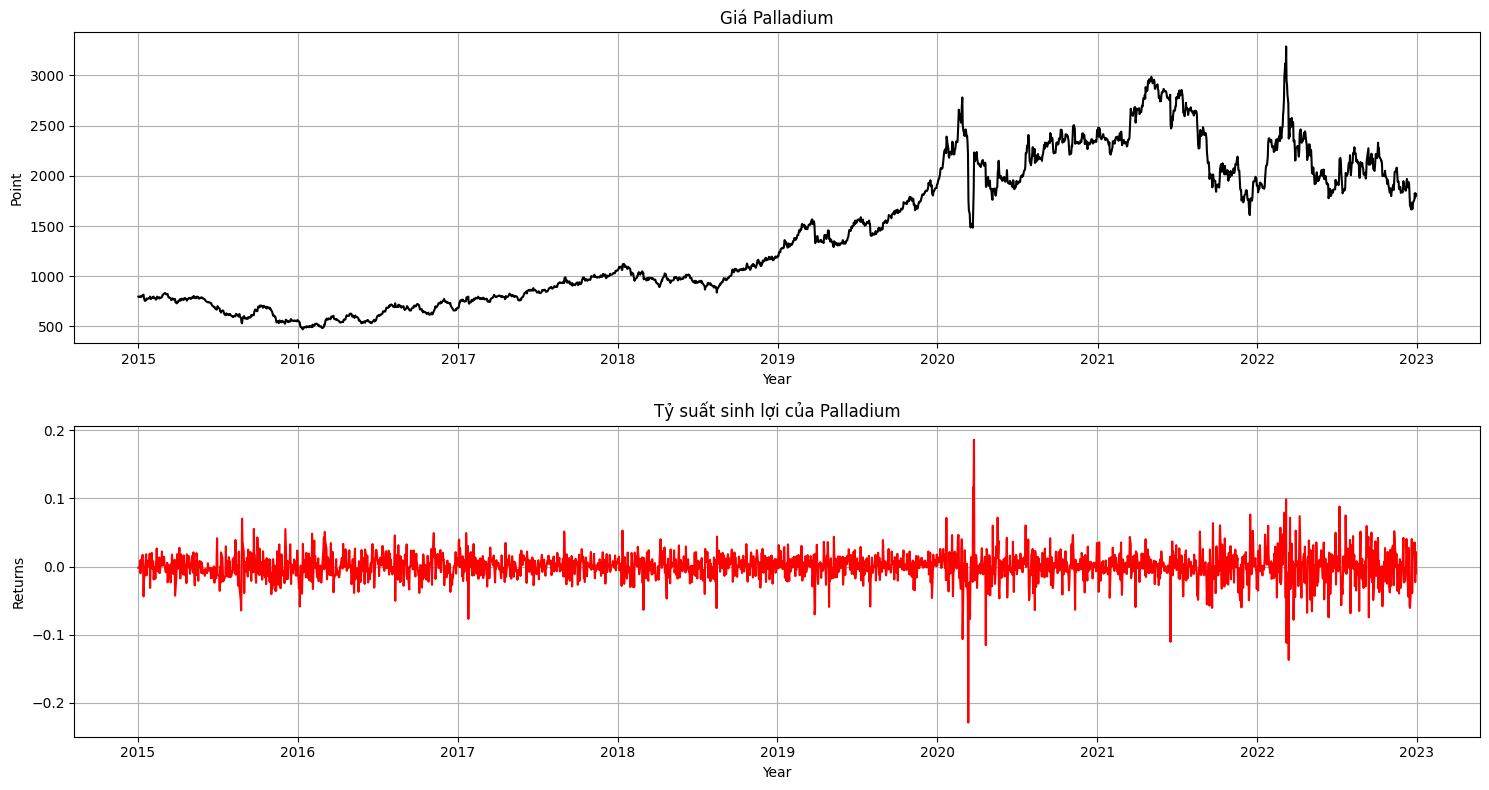

In [929]:
fig, ax= plt.subplots(2,1, figsize=(15,8))
ax[0].plot(df_pp, color='black')
ax[0].title.set_text('Giá Palladium')
ax[0].set(xlabel='Year', ylabel='Point')
ax[0].grid(True)
ax[1].plot(df_r_pp_temp, color='red')
ax[1].title.set_text('Tỷ suất sinh lợi của Palladium')
ax[1].set(xlabel='Year', ylabel='Returns')
ax[1].grid(True)
plt.tight_layout()

### 3. Description Statistic

In [930]:
print('Obs       :', len(r_pp))
print('Median    :', np.median(r_pp))
print('Mean      :', np.mean(r_pp))
print('Std. Dev  :', np.std(r_pp, ddof=1))
print('Minimum   :', np.min(r_pp))
print('Maximum   :', np.max(r_pp))
print('Skewness  :', stats.skew(r_pp))
print('Kurtosis  :', stats.kurtosis(r_pp, fisher = False))
print('Jarque-Bera test:', stats.jarque_bera(r_pp))

Obs       : 2323
Median    : 0.0010352135
Mean      : 0.00035268234
Std. Dev  : 0.021187821
Minimum   : -0.22917128
Maximum   : 0.18627024
Skewness  : -0.5590508793995949
Kurtosis  : 14.868310770307795
Jarque-Bera test: SignificanceResult(statistic=13754.768757804628, pvalue=0.0)


In [931]:
adf_pp = adfuller(r_pp)
print('ADF Statistic:', adf_pp[0])
print('p-value:', adf_pp[1])
print('Critical Values:', adf_pp[4])

ADF Statistic: -13.131759190992538
p-value: 1.4897734287827031e-24
Critical Values: {'1%': -3.433195115207185, '5%': -2.8627969090099765, '10%': -2.567439109419199}


### 4. ARCH(1)

In [932]:
#Chuyển TSSL sang dạng % cho thuận tiện
rp_pp = r_pp*100

In [933]:
#Ước lượng mô hình ARCH(1)
am0= arch_model(rp_pp, mean = 'Constant', p=1, o=0, q=0, dist=dist)
arch1 = am0.fit(update_freq=5, disp = "off")
print("ARCH(1) model:", "\n", arch1.summary(), "\n")
#Kiểm định phần dư của ARCH(1)
arch_stdresid= arch1.resid/arch1.conditional_volatility
arch1lb = acorr_ljungbox(arch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',arch1lb)
jb_arch = jarque_bera(arch_stdresid)
print('\nJB Test Result:','\n',jb_arch)


ARCH(1) model: 
                       Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4906.77
Distribution:                  Normal   AIC:                           9819.55
Method:            Maximum Likelihood   BIC:                           9836.80
                                        No. Observations:                 2323
Date:                Fri, Jun 14 2024   Df Residuals:                     2322
Time:                        13:44:31   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0710  4.258e-02      1.667 

In [934]:
# LM test
arch1.arch_lm_test(standardized=True)

ARCH-LM Test
H0: Standardized residuals are homoskedastic.
ARCH-LM Test
H1: Standardized residuals are conditionally heteroskedastic.
Statistic: 162.7666
P-value: 0.0000
Distributed: chi2(27)
WaldTestStatistic, id: 0x1715e2a2fb0

### 5. GARCH(1, 1)

In [935]:
#Ước lượng mô hình GARCH(1,1)
am1 = arch_model(rp_pp, mean = 'Constant', vol='GARCH', p=1, o=0, q=1, dist=dist)
garch1_1 = am1.fit(update_freq=5, disp = "off")
print("GARCH(1,1) model:", "\n", garch1_1.summary(), "\n")

#Kiểm định phần dư của GARCH(1,1)
garch_stdresid= garch1_1.resid/garch1_1.conditional_volatility
garch11lb = acorr_ljungbox(garch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',garch11lb)
jb_arch = jarque_bera(garch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

GARCH(1,1) model: 
                      Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4801.59
Distribution:                  Normal   AIC:                           9611.17
Method:            Maximum Likelihood   BIC:                           9634.17
                                        No. Observations:                 2323
Date:                Fri, Jun 14 2024   Df Residuals:                     2322
Time:                        13:44:31   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0700  3.673e-02      1.9

### 6. GJR-GARCH

In [936]:
#Ước lượng mô hình TGARCH(1,1)
am2 = arch_model(rp_pp, mean = 'Constant', vol='GARCH', p=1, o=1, q=1, dist=dist)
leverage_garch1_1 = am2.fit(update_freq=5, disp = "off")
print("TGARCH(1,1) model:", "\n", leverage_garch1_1.summary(), "\n")

#Kiểm định phần dư của TGARCH(1,1)
tgarch_stdresid= leverage_garch1_1.resid/leverage_garch1_1.conditional_volatility
tgarch11lb = acorr_ljungbox(tgarch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',tgarch11lb)
jb_arch = jarque_bera(tgarch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

TGARCH(1,1) model: 
                    Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -4801.38
Distribution:                  Normal   AIC:                           9612.76
Method:            Maximum Likelihood   BIC:                           9641.51
                                        No. Observations:                 2323
Date:                Fri, Jun 14 2024   Df Residuals:                     2322
Time:                        13:44:31   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0749  3.790e-02      1.975

### 7. EGRACH

In [937]:
#Ước lượng mô hình EGARCH(1,1)
am3 = arch_model(rp_pp, mean = 'Constant', vol='EGARCH', p=1, o=1, q=1, dist=dist)
exponetial_garch1_1 = am3.fit(update_freq=5, disp = "off")
print("EGARCH(1,1) model:", "\n", exponetial_garch1_1.summary(), "\n")

#Kiểm định phần dư của TGARCH(1,1)
egarch_stdresid= exponetial_garch1_1.resid/exponetial_garch1_1.conditional_volatility
egarch11lb = acorr_ljungbox(egarch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',egarch11lb)
jb_arch = jarque_bera(egarch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

EGARCH(1,1) model: 
                      Constant Mean - EGARCH Model Results                     
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -4810.66
Distribution:                  Normal   AIC:                           9631.32
Method:            Maximum Likelihood   BIC:                           9660.07
                                        No. Observations:                 2323
Date:                Fri, Jun 14 2024   Df Residuals:                     2322
Time:                        13:44:31   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0838  3.801e-02      2.205

### 8. Evaluate

In [938]:
#Tính các giá trị sai số của mô hình ARCH(1)
res= am0.fit(last_obs=1987, update_freq=5, disp='off')
forecasts = res.forecast(horizon=1)
forecast_vals = forecasts.residual_variance.values[-10:]
actual_vals = rp_pbk[-10:]

rmse_arch1 = np.sqrt(mean_squared_error(actual_vals, forecast_vals))
mae_arch1 = mean_absolute_error(actual_vals, forecast_vals)
mape_arch1 = np.mean(np.abs(forecast_vals - actual_vals)/np.abs(actual_vals))

tic_arch1 = tic(forecast_vals, actual_vals) 

print('ARCH(1):')
print('RMSE: %0.3f' % rmse_arch1)
print('MAE: %0.3f' % mae_arch1) 
print('MAPE: %0.3f' % mape_arch1)
print('TIC: % 0.3f' % tic_arch1)

#Tính các giá trị sai số của mô hình GARCH(1,1)
res1= am1.fit(last_obs=1987, update_freq=5, disp='off')
forecasts1 = res1.forecast(horizon=1)
forecast_vals1 = forecasts1.residual_variance.values[-10:]

rmse_garch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals1))
mae_garch11 = mean_absolute_error(actual_vals, forecast_vals1)
mape_garch11 = np.mean(np.abs(forecast_vals1 - actual_vals)/np.abs(actual_vals))

tic_garch11 = tic(forecast_vals1, actual_vals) 

print('\nRMSE: %0.3f' % rmse_garch11)
print('MAE: %0.3f' % mae_garch11) 
print('MAPE: %0.3f' % mape_garch11)
print('TIC: % 0.3f' % tic_garch11)

#Tính các giá trị sai số của mô hình TGARCH(1,1)
res2= am2.fit(last_obs=1987, update_freq=5, disp='off')
forecasts2 = res2.forecast(horizon=1)
forecast_vals2 = forecasts2.residual_variance.values[-10:]

rmse_tgarch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals2))
mae_tgarch11 = mean_absolute_error(actual_vals, forecast_vals2)
mape_tgarch11 = np.mean(np.abs(forecast_vals2 - actual_vals)/np.abs(actual_vals))

tic_tgarch11 = tic(forecast_vals2, actual_vals) 

print('\nRMSE: %0.3f' % rmse_tgarch11)
print('MAE: %0.3f' % mae_tgarch11) 
print('MAPE: %0.3f' % mape_tgarch11)
print('TIC: % 0.3f' % tic_tgarch11)

#Tính các giá trị sai số của mô hình EGARCH(1,1)
res3= am3.fit(last_obs=1987, update_freq=5, disp='off')
forecasts3 = res3.forecast(horizon=1)
forecast_vals3 = forecasts3.residual_variance.values[-10:]

rmse_egarch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals3))
mae_egarch11 = mean_absolute_error(actual_vals, forecast_vals3)
mape_egarch11 = np.mean(np.abs(forecast_vals3 - actual_vals)/np.abs(actual_vals))

tic_egarch11 = tic(forecast_vals3, actual_vals) 

print('\nRMSE: %0.3f' % rmse_egarch11)
print('MAE: %0.3f' % mae_egarch11) 
print('MAPE: %0.3f' % mape_egarch11)
print('TIC: % 0.3f' % tic_egarch11)

RMSE_value=[rmse_arch1, rmse_garch11, rmse_tgarch11, rmse_egarch11]
best_RMSEprediction= np.argmin(RMSE_value)
print('\nBest Forecasting Model (Lowest RMSE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_RMSEprediction])

MAE_value=[mae_arch1, mae_arch1, mae_tgarch11, mae_egarch11]
best_MAEprediction= np.argmin(MAE_value)
print('\nBest Forecasting Model (Lowest MAE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_MAEprediction])

MAPE_value=[mape_arch1, mape_garch11, mape_tgarch11, mape_egarch11]
best_MAPEprediction= np.argmin(MAPE_value)
print('\nBest Forecasting Model (Lowest MAPE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_MAPEprediction])

TIC_value=[tic_arch1, tic_garch11, tic_tgarch11, tic_egarch11]
best_TICprediction= np.argmin(TIC_value)
print('\nBest Forecasting Model (Lowest TIC):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_TICprediction])

ARCH(1):
RMSE: 4.799
MAE: 4.138
MAPE: 4.474
TIC:  6.923

RMSE: 7.563
MAE: 7.155
MAPE: 7.285
TIC:  10.607

RMSE: 7.630
MAE: 7.214
MAPE: 7.339
TIC:  10.690

RMSE: 8.754
MAE: 8.406
MAPE: 8.434
TIC:  12.294

Best Forecasting Model (Lowest RMSE): ARCH(1)

Best Forecasting Model (Lowest MAE): ARCH(1)

Best Forecasting Model (Lowest MAPE): ARCH(1)

Best Forecasting Model (Lowest TIC): ARCH(1)


## PB

### 1. Data preparation

In [939]:
df_pb = PB_df.copy()
df_pb = df_pb.set_index('Date')
df_pb.index = pd.to_datetime(df_pb.index)
# df = df.to_numpy()
df_pb

,PB
Date,
2015-01-02,15.768
2015-01-05,16.213
2015-01-06,16.637
2015-01-07,16.544
2015-01-08,16.385
...,...
2022-12-26,24.055
2022-12-27,24.217
2022-12-28,23.840


In [940]:
df_data_pb = PB_df.copy()
df_data_pb = df_data_pb.to_numpy()
data_pb = df_data_pb[:, 1]
data_pb = np.float32(data_pb)
data_pb

array([15.768, 16.213, 16.637, ..., 23.84 , 24.25 , 24.04 ], dtype=float32)

In [941]:
r_pb = np.diff(np.log(data_pb), n=1, axis=0)
r_pb

array([ 0.02783084,  0.02581573, -0.00560546, ..., -0.01569009,
        0.01705194, -0.00869751], dtype=float32)

In [942]:
df_r_pb_temp = PB_df.copy()
df_r_pb_temp.drop(axis=0, index=[0], inplace=True)
df_r_pb_temp

,Date,PB
1,2015-01-05,16.213
2,2015-01-06,16.637
3,2015-01-07,16.544
4,2015-01-08,16.385
5,2015-01-09,16.419
...,...,...
2046,2022-12-26,24.055
2047,2022-12-27,24.217
2048,2022-12-28,23.840
2049,2022-12-29,24.250


In [943]:
df_r_pb_temp['Return'] = r_pb
df_r_pb_temp.drop(axis=1, columns='PB', inplace=True)
df_r_pb_temp = df_r_pb_temp.set_index('Date')
df_r_pb_temp.index = pd.to_datetime(df_r_pb_temp.index)
df_r_pb_temp

,Return
Date,
2015-01-05,0.027831
2015-01-06,0.025816
2015-01-07,-0.005605
2015-01-08,-0.009657
2015-01-09,0.002073
...,...
2022-12-26,0.005628
2022-12-27,0.006712
2022-12-28,-0.015690


### 2. Visualize

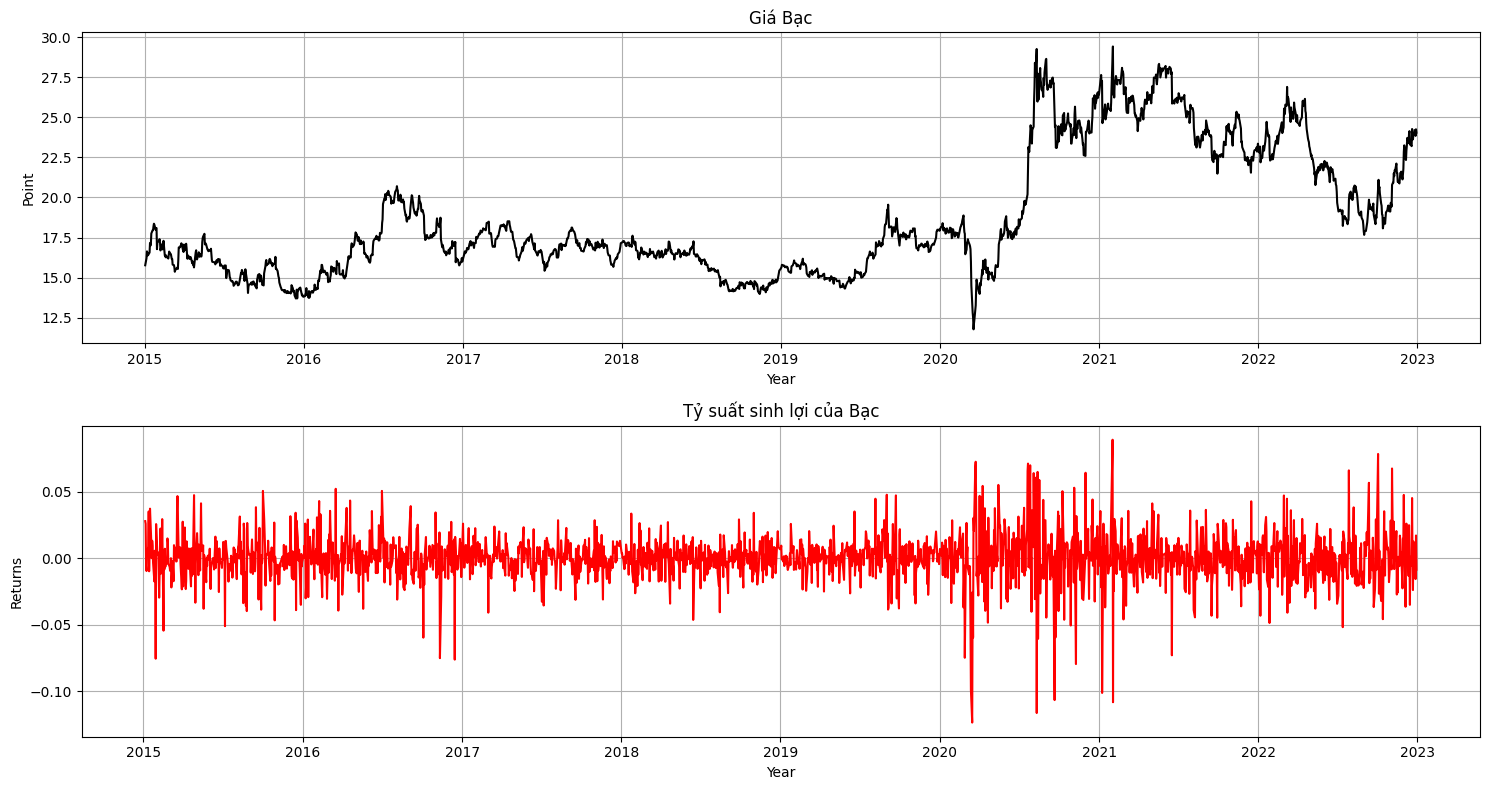

In [944]:
fig, ax= plt.subplots(2,1, figsize=(15,8))
ax[0].plot(df_pb, color='black')
ax[0].title.set_text('Giá Bạc')
ax[0].set(xlabel='Year', ylabel='Point')
ax[0].grid(True)
ax[1].plot(df_r_pb_temp, color='red')
ax[1].title.set_text('Tỷ suất sinh lợi của Bạc')
ax[1].set(xlabel='Year', ylabel='Returns')
ax[1].grid(True)
plt.tight_layout()

### 3. Description Statistic

In [945]:
print('Obs       :', len(r_pb))
print('Median    :', np.median(r_pb))
print('Mean      :', np.mean(r_pb))
print('Std. Dev  :', np.std(r_pb, ddof=1))
print('Minimum   :', np.min(r_pb))
print('Maximum   :', np.max(r_pb))
print('Skewness  :', stats.skew(r_pb))
print('Kurtosis  :', stats.kurtosis(r_pb, fisher = False))
print('Jarque-Bera test:', stats.jarque_bera(r_pb))

Obs       : 2050
Median    : 0.00020337105
Mean      : 0.00020572523
Std. Dev  : 0.01784452
Minimum   : -0.123454094
Maximum   : 0.08896017
Skewness  : -0.5310236013368216
Kurtosis  : 9.377742609847544
Jarque-Bera test: SignificanceResult(statistic=3570.719473718848, pvalue=0.0)


In [946]:
adf_pb= adfuller(r_pb)
print('ADF Statistic:', adf_pb[0])
print('p-value:', adf_pb[1])
print('Critical Values:', adf_pb[4])

ADF Statistic: -22.854883416686114
p-value: 0.0
Critical Values: {'1%': -3.433550158004116, '5%': -2.8629536749602478, '10%': -2.5675225771861077}


### 4. ARCH(1)

In [947]:
#Chuyển TSSL sang dạng % cho thuận tiện
rp_pb = r_pb*100

In [948]:
#Ước lượng mô hình ARCH(1)
am0= arch_model(rp_pb, mean = 'Constant', p=1, o=0, q=0, dist=dist)
arch1 = am0.fit(update_freq=5, disp = "off")
print("ARCH(1) model:", "\n", arch1.summary(), "\n")
#Kiểm định phần dư của ARCH(1)
arch_stdresid= arch1.resid/arch1.conditional_volatility
arch1lb = acorr_ljungbox(arch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',arch1lb)
jb_arch = jarque_bera(arch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

ARCH(1) model: 
                       Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4018.96
Distribution:                  Normal   AIC:                           8043.91
Method:            Maximum Likelihood   BIC:                           8060.79
                                        No. Observations:                 2050
Date:                Fri, Jun 14 2024   Df Residuals:                     2049
Time:                        13:44:32   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -9.6607e-03  3.830e-02  

In [949]:
# LM test
arch1.arch_lm_test(standardized=True)

ARCH-LM Test
H0: Standardized residuals are homoskedastic.
ARCH-LM Test
H1: Standardized residuals are conditionally heteroskedastic.
Statistic: 119.0972
P-value: 0.0000
Distributed: chi2(26)
WaldTestStatistic, id: 0x1715ea2f9d0

### 5. GARCH(1, 1)

In [950]:
#Ước lượng mô hình GARCH(1,1)
am1 = arch_model(rp_pb, mean = 'Constant', vol='GARCH', p=1, o=0, q=1, dist=dist)
garch1_1 = am1.fit(update_freq=5, disp = "off")
print("GARCH(1,1) model:", "\n", garch1_1.summary(), "\n")

#Kiểm định phần dư của GARCH(1,1)
garch_stdresid= garch1_1.resid/garch1_1.conditional_volatility
garch11lb = acorr_ljungbox(garch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',garch11lb)
jb_arch = jarque_bera(garch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

GARCH(1,1) model: 
                      Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3902.21
Distribution:                  Normal   AIC:                           7812.42
Method:            Maximum Likelihood   BIC:                           7834.92
                                        No. Observations:                 2050
Date:                Fri, Jun 14 2024   Df Residuals:                     2049
Time:                        13:44:33   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -8.4434e-03  3.300e-0

### 6. GJR-GARCH

In [951]:
#Ước lượng mô hình TGARCH(1,1)
am2 = arch_model(rp_pb, mean = 'Constant', vol='GARCH', p=1, o=1, q=1, dist=dist)
leverage_garch1_1 = am2.fit(update_freq=5, disp = "off")
print("TGARCH(1,1) model:", "\n", leverage_garch1_1.summary(), "\n")

#Kiểm định phần dư của TGARCH(1,1)
tgarch_stdresid= leverage_garch1_1.resid/leverage_garch1_1.conditional_volatility
tgarch11lb = acorr_ljungbox(tgarch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',tgarch11lb)
jb_arch = jarque_bera(tgarch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

TGARCH(1,1) model: 
                    Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -3900.09
Distribution:                  Normal   AIC:                           7810.18
Method:            Maximum Likelihood   BIC:                           7838.31
                                        No. Observations:                 2050
Date:                Fri, Jun 14 2024   Df Residuals:                     2049
Time:                        13:44:33   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.9698e-04  3.361e-02  

### 7. EGARCH

In [952]:
#Ước lượng mô hình EGARCH(1,1)
am3 = arch_model(rp_pb, mean = 'Constant', vol='EGARCH', p=1, o=1, q=1, dist=dist)
exponetial_garch1_1 = am3.fit(update_freq=5, disp = "off")
print("EGARCH(1,1) model:", "\n", exponetial_garch1_1.summary(), "\n")

#Kiểm định phần dư của TGARCH(1,1)
egarch_stdresid= exponetial_garch1_1.resid/exponetial_garch1_1.conditional_volatility
egarch11lb = acorr_ljungbox(egarch_stdresid, lags=[5,10,15,20]) 
print('LB Test Result:','\n',egarch11lb)
jb_arch = jarque_bera(egarch_stdresid)
print('\nJB Test Result:','\n',jb_arch)

EGARCH(1,1) model: 
                      Constant Mean - EGARCH Model Results                     
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -3900.49
Distribution:                  Normal   AIC:                           7810.98
Method:            Maximum Likelihood   BIC:                           7839.11
                                        No. Observations:                 2050
Date:                Fri, Jun 14 2024   Df Residuals:                     2049
Time:                        13:44:33   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0141  3.494e-02  

### 8. Evaluate

In [953]:
#Tính các giá trị sai số của mô hình ARCH(1)
res= am0.fit(last_obs=1987, update_freq=5, disp='off')
forecasts = res.forecast(horizon=1)
forecast_vals = forecasts.residual_variance.values[-10:]
actual_vals = rp_pbk[-10:]

rmse_arch1 = np.sqrt(mean_squared_error(actual_vals, forecast_vals))
mae_arch1 = mean_absolute_error(actual_vals, forecast_vals)
mape_arch1 = np.mean(np.abs(forecast_vals - actual_vals)/np.abs(actual_vals))

tic_arch1 = tic(forecast_vals, actual_vals) 

print('ARCH(1):')
print('RMSE: %0.3f' % rmse_arch1)
print('MAE: %0.3f' % mae_arch1) 
print('MAPE: %0.3f' % mape_arch1)
print('TIC: % 0.3f' % tic_arch1)

#Tính các giá trị sai số của mô hình GARCH(1,1)
res1= am1.fit(last_obs=1987, update_freq=5, disp='off')
forecasts1 = res1.forecast(horizon=1)
forecast_vals1 = forecasts1.residual_variance.values[-10:]

rmse_garch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals1))
mae_garch11 = mean_absolute_error(actual_vals, forecast_vals1)
mape_garch11 = np.mean(np.abs(forecast_vals1 - actual_vals)/np.abs(actual_vals))

tic_garch11 = tic(forecast_vals1, actual_vals) 

print('\nRMSE: %0.3f' % rmse_garch11)
print('MAE: %0.3f' % mae_garch11) 
print('MAPE: %0.3f' % mape_garch11)
print('TIC: % 0.3f' % tic_garch11)

#Tính các giá trị sai số của mô hình TGARCH(1,1)
res2= am2.fit(last_obs=1987, update_freq=5, disp='off')
forecasts2 = res2.forecast(horizon=1)
forecast_vals2 = forecasts2.residual_variance.values[-10:]

rmse_tgarch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals2))
mae_tgarch11 = mean_absolute_error(actual_vals, forecast_vals2)
mape_tgarch11 = np.mean(np.abs(forecast_vals2 - actual_vals)/np.abs(actual_vals))

tic_tgarch11 = tic(forecast_vals2, actual_vals) 

print('\nRMSE: %0.3f' % rmse_tgarch11)
print('MAE: %0.3f' % mae_tgarch11) 
print('MAPE: %0.3f' % mape_tgarch11)
print('TIC: % 0.3f' % tic_tgarch11)

#Tính các giá trị sai số của mô hình EGARCH(1,1)
res3= am3.fit(last_obs=1987, update_freq=5, disp='off')
forecasts3 = res3.forecast(horizon=1)
forecast_vals3 = forecasts3.residual_variance.values[-10:]

rmse_egarch11 = np.sqrt(mean_squared_error(actual_vals, forecast_vals3))
mae_egarch11 = mean_absolute_error(actual_vals, forecast_vals3)
mape_egarch11 = np.mean(np.abs(forecast_vals3 - actual_vals)/np.abs(actual_vals))

tic_egarch11 = tic(forecast_vals3, actual_vals) 

print('\nRMSE: %0.3f' % rmse_egarch11)
print('MAE: %0.3f' % mae_egarch11) 
print('MAPE: %0.3f' % mape_egarch11)
print('TIC: % 0.3f' % tic_egarch11)

RMSE_value=[rmse_arch1, rmse_garch11, rmse_tgarch11, rmse_egarch11]
best_RMSEprediction= np.argmin(RMSE_value)
print('\nBest Forecasting Model (Lowest RMSE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_RMSEprediction])

MAE_value=[mae_arch1, mae_arch1, mae_tgarch11, mae_egarch11]
best_MAEprediction= np.argmin(MAE_value)
print('\nBest Forecasting Model (Lowest MAE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_MAEprediction])

MAPE_value=[mape_arch1, mape_garch11, mape_tgarch11, mape_egarch11]
best_MAPEprediction= np.argmin(MAPE_value)
print('\nBest Forecasting Model (Lowest MAPE):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_MAPEprediction])

TIC_value=[tic_arch1, tic_garch11, tic_tgarch11, tic_egarch11]
best_TICprediction= np.argmin(TIC_value)
print('\nBest Forecasting Model (Lowest TIC):', ['ARCH(1)', 'GARCH(1,1)', 'TGARCH(1_1)', 'EGARCH(1_1)'][best_TICprediction])

ARCH(1):
RMSE: 3.313
MAE: 2.994
MAPE: 3.054
TIC:  4.960

RMSE: 4.389
MAE: 3.766
MAPE: 4.171
TIC:  6.184

RMSE: 4.731
MAE: 4.152
MAPE: 4.527
TIC:  6.671

RMSE: 5.078
MAE: 4.561
MAPE: 4.903
TIC:  7.185

Best Forecasting Model (Lowest RMSE): ARCH(1)

Best Forecasting Model (Lowest MAE): ARCH(1)

Best Forecasting Model (Lowest MAPE): ARCH(1)

Best Forecasting Model (Lowest TIC): ARCH(1)
